<a href="https://colab.research.google.com/github/LeNoRaV/MathStat/blob/main/%D0%A2%D0%A1%D0%9F_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задача 1.**
Дана однородная Марковская цепь с данным числом состояний {S_1,S_2,…,S_m }. Ненулевые переходные вероятности p_ij, i≠j, заданы в таблице.

**Задание.**
1. Выпишите матрицу переходных вероятностей
2. Изобразите размеченный граф Марковской цепи
3. Докажите, что цепь эргодическая
4. Смоделируйте вектор начальных вероятностей p(0) согласно приложенному алгоритму.
5. Вычислите безусловные вероятности состояний смоделированной цепи на k шаге по формуле из лекции 1 для полученного p(0).
6. Смоделируйте  n  траекторий полученной цепи за k шагов (см алгоритм ниже). Несколько траекторий выведите на печать.
7. По полученным реализациям траекторий найдите вектор эмпирических безусловных вероятностей состояний цепи на k шаге. 
8. Сравните найденные эмпирические вероятности с теоретическими для k шага.
9. Вычислите финальные вероятности для рассматриваемой Марковской цепи (лекция 2) и сравните их c вероятностями состояний на k шаге.
Сформулируйте выводы.

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt
import seaborn as sb
import random
from prettytable import PrettyTable

np.set_printoptions(precision=3, suppress=True)

Домашнее задание выполнено в среде Colab Research. 

**Данные:**


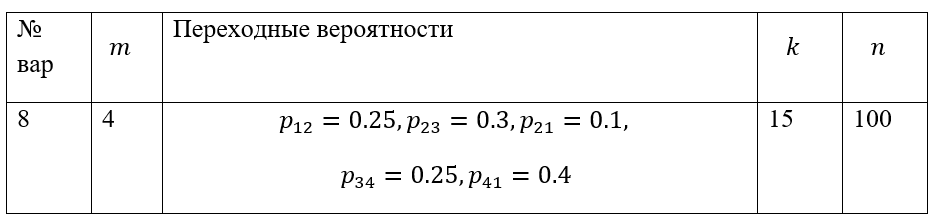

In [ ]:
m=4
k=15
n=100

p=[]
for i in range(m):
  buf=[]
  for j in range(m):
    buf.append(0.0)
  p.append(buf)
  
p[0][1]=0.25; p[0][0]=1 - 0.25
p[1][2]=0.3; p[1][1]=1 - 0.3
p[1][0]=0.1; p[1][1]-=0.1
p[2][3]=0.25; p[2][2]=1 - 0.25
p[3][0]=0.4; p[3][3]=1 - 0.4

print("Матрица переходных состояний P:", '\n')
  
print('\n'.join('\t'.join(map(str, row)) for row in p))


Матрица переходных состояний P: 

0.75	0.25	0.0	0.0
0.1	0.6	0.3	0.0
0.0	0.0	0.75	0.25
0.4	0.0	0.0	0.6


**Решение:**

Алгоритм моделирования начального вектора вероятностей состояний 

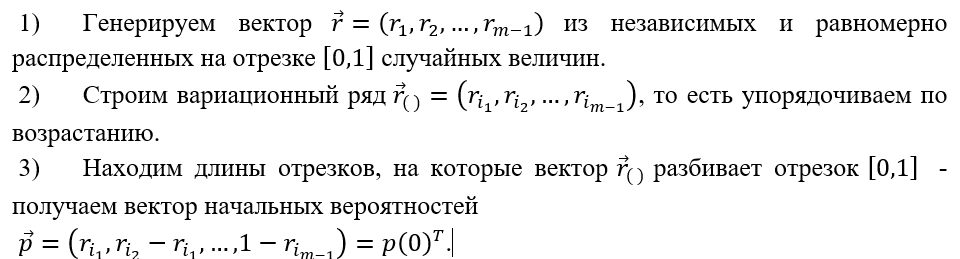

In [ ]:
#r=[]
#for i in range(m-1):
#  r.append(random.random())
#print('r =', r)

r = [0.2971575187867702, 0.22191817664351365, 0.7922345556006378]

r.sort()
print('r() =', r)

p_0=[]
p_0.append(r[0])
for i in range(1,m-1):
  p_0.append(r[i]-r[i-1])
p_0.append(1-r[m-2])
print('p_0 =', p_0)

sum=0
for i in range(m):
  sum+=p_0[i]
print(sum)

r() = [0.22191817664351365, 0.2971575187867702, 0.7922345556006378]
p_0 = [0.22191817664351365, 0.07523934214325656, 0.4950770368138676, 0.20776544439936218]
1.0


In [ ]:
P = np.array([[0.75, 0.25, 0.0, 0.0], [0.1, 0.6,0.3,0.0],[0.0,0.0,0.75,0.25],[0.4,0.0,0.0,0.6]])
result = np.linalg.matrix_power(P, k)
print(result)

[[0.354 0.218 0.262 0.167]
 [0.354 0.223 0.261 0.162]
 [0.349 0.223 0.266 0.162]
 [0.348 0.215 0.267 0.169]]


In [ ]:
#total = P.dot(p_0)
p_0 = np.array([0.22191817664351365, 0.07523934214325656, 0.4950770368138676, 0.20776544439936218])
total = np.dot(p_0, result)
print(total)

[0.35  0.22  0.265 0.165]


In [ ]:
#r_i=[]
#for i in range(n):
#  buf=[]
#  for j in range(k):
#    buf.append(random.random())
#  r_i.append(buf)

#np.savetxt('test1.txt', r_i, fmt='%f')

p_i=[]
for i in range(n):
  buf=[]
  for j in range(k):
    buf.append(0)
  p_i.append(buf)

r_j = np.loadtxt('test1.txt', dtype=float)

print('\n'.join('\t'.join(map(str, row)) for row in r_j))

0.673503	0.478914	0.280075	0.061299	0.680311	0.608499	0.335489	0.953914	0.697325	0.238889	0.162353	0.57319	0.793628	0.677144	0.927089
0.629843	0.465036	0.381198	0.586117	0.929606	0.953851	0.535839	0.348045	0.312702	0.549694	0.310338	0.27625	0.837482	0.156121	0.222021
0.069273	0.649715	0.720816	0.628845	0.083042	0.084811	0.995751	0.001276	0.791115	0.330599	0.659331	0.722652	0.638773	0.825164	0.913149
0.234919	0.201427	0.239808	0.942036	0.040769	0.672765	0.623477	0.860213	0.9044	0.302123	0.239374	0.067507	0.308267	0.757786	0.296875
0.774308	0.230203	0.179831	0.992947	0.135557	0.418803	0.001129	0.688619	0.376156	0.660359	0.126944	0.526725	0.100398	0.689822	0.663247
0.415153	0.586371	0.152175	0.261244	0.031924	0.176921	0.969761	0.442944	0.580938	0.604121	0.227288	0.265622	0.188029	0.48797	0.119474
0.658333	0.071533	0.712131	0.469542	0.580803	0.036582	0.296598	0.754222	0.943956	0.23067	0.391097	0.133381	0.467558	0.955423	0.361728
0.143448	0.820941	0.293716	0.59523	0.543553	0.318942	0.426432

In [ ]:
for i in range(n):
  for j in range(k):
    rand=r_j[i][j]
    if j==0:
      R=r
      if rand<=R[0]: psi=0
      elif rand<=R[1]: psi=1
      elif rand<=R[2]: psi=2
      else: psi=3
      p_i[i][j]=psi+1
      print('i =',i,'j =',j)
      print('R =', R)
      print('rand =', rand)
      print('psi =', psi+1)
    else:
      #P_new = np.linalg.matrix_power(P, j)
      #R_buf=P_new[psi]
      R_buf=P[psi]
      R=[]
      sum=0
      for l in range(3):
        sum+=R_buf[l]
        R.append(sum)
      if rand<=R[0]: psi=0
      elif rand<=R[1]: psi=1
      elif rand<=R[2]: psi=2
      else: psi=3
      p_i[i][j]=psi+1
      print('i =',i,'j =',j)
      print('R_buf =', R_buf)
      print('R =', R)
      print('rand =', rand)
      print('psi =', psi+1)


Выходные данные были обрезаны до нескольких последних строк (5000).
rand = 0.57075
psi = 4
i = 32 j = 7
R_buf = [0.4 0.  0.  0.6]
R = [0.4, 0.4, 0.4]
rand = 0.228189
psi = 1
i = 32 j = 8
R_buf = [0.75 0.25 0.   0.  ]
R = [0.75, 1.0, 1.0]
rand = 0.078702
psi = 1
i = 32 j = 9
R_buf = [0.75 0.25 0.   0.  ]
R = [0.75, 1.0, 1.0]
rand = 0.666375
psi = 1
i = 32 j = 10
R_buf = [0.75 0.25 0.   0.  ]
R = [0.75, 1.0, 1.0]
rand = 0.993427
psi = 2
i = 32 j = 11
R_buf = [0.1 0.6 0.3 0. ]
R = [0.1, 0.7, 1.0]
rand = 0.521677
psi = 2
i = 32 j = 12
R_buf = [0.1 0.6 0.3 0. ]
R = [0.1, 0.7, 1.0]
rand = 0.291806
psi = 2
i = 32 j = 13
R_buf = [0.1 0.6 0.3 0. ]
R = [0.1, 0.7, 1.0]
rand = 0.198877
psi = 2
i = 32 j = 14
R_buf = [0.1 0.6 0.3 0. ]
R = [0.1, 0.7, 1.0]
rand = 0.040462
psi = 1
i = 33 j = 0
R = [0.22191817664351365, 0.2971575187867702, 0.7922345556006378]
rand = 0.436055
psi = 3
i = 33 j = 1
R_buf = [0.   0.   0.75 0.25]
R = [0.0, 0.0, 0.75]
rand = 0.439748
psi = 3
i = 33 j = 2
R_buf = [0.   0.   0.

In [ ]:
for i in range(n):
  print(p_i[i])
  print('--------------------------------------------')

[3, 3, 3, 3, 3, 3, 3, 4, 4, 1, 1, 1, 2, 2, 3]
--------------------------------------------
[3, 3, 3, 3, 4, 4, 4, 1, 1, 1, 1, 1, 2, 2, 2]
--------------------------------------------
[1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 3, 3, 4, 4]
--------------------------------------------
[2, 2, 2, 3, 3, 3, 3, 4, 4, 1, 1, 1, 1, 2, 2]
--------------------------------------------
[3, 3, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
--------------------------------------------
[3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 1, 1, 1, 1, 1]
--------------------------------------------
[3, 3, 3, 3, 3, 3, 3, 4, 4, 1, 1, 1, 1, 2, 2]
--------------------------------------------
[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3]
--------------------------------------------
[4, 4, 4, 4, 4, 1, 2, 2, 3, 3, 4, 4, 1, 2, 2]
--------------------------------------------
[4, 4, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3]
--------------------------------------------
[3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2]
--------------------------------------------

In [ ]:
P = np.array([[0.75, 0.25, 0.0, 0.0], [0.1, 0.6,0.3,0.0],[0.0,0.0,0.75,0.25],[0.4,0.0,0.0,0.6]])

n_j=[0,0,0,0]
for j in range(k):
  for s in range(1, m+1):
    sum=0
    for i in range(n):
      if p_i[i][j]==s: sum+=1
    n_j[s-1]=sum/n    #p^(k)
  print('p^(',j,') = ', n_j)

  if j==0: total=p_0
  else: 
    result = np.linalg.matrix_power(P, j)
    total = np.dot(p_0, result)
  print('p(',j,') = ', total)
  print('Разница между p^(',j,') и p(',j,')', n_j-total, '\n')

p^( 0 ) =  [0.25, 0.07, 0.54, 0.14]
p( 0 ) =  [0.222 0.075 0.495 0.208]
Разница между p^( 0 ) и p( 0 ) [ 0.028 -0.005  0.045 -0.068] 

p^( 1 ) =  [0.22, 0.12, 0.47, 0.19]
p( 1 ) =  [0.257 0.101 0.394 0.248]
Разница между p^( 1 ) и p( 1 ) [-0.037  0.019  0.076 -0.058] 

p^( 2 ) =  [0.23, 0.1, 0.42, 0.25]
p( 2 ) =  [0.302 0.125 0.326 0.248]
Разница между p^( 2 ) и p( 2 ) [-0.072 -0.025  0.094  0.002] 

p^( 3 ) =  [0.22, 0.13, 0.37, 0.28]
p( 3 ) =  [0.338 0.15  0.282 0.23 ]
Разница между p^( 3 ) и p( 3 ) [-0.118 -0.02   0.088  0.05 ] 

p^( 4 ) =  [0.23, 0.12, 0.3, 0.35]
p( 4 ) =  [0.361 0.175 0.256 0.208]
Разница между p^( 4 ) и p( 4 ) [-0.131 -0.055  0.044  0.142] 

p^( 5 ) =  [0.33, 0.1, 0.29, 0.28]
p( 5 ) =  [0.371 0.195 0.245 0.189]
Разница между p^( 5 ) и p( 5 ) [-0.041 -0.095  0.045  0.091] 

p^( 6 ) =  [0.42, 0.14, 0.28, 0.16]
p( 6 ) =  [0.374 0.21  0.242 0.175]
Разница между p^( 6 ) и p( 6 ) [ 0.046 -0.07   0.038 -0.015] 

p^( 7 ) =  [0.4, 0.14, 0.29, 0.17]
p( 7 ) =  [0.371 0.219 